Name : Suyash Kamath
----
Roll : 21102B0044
---
Class : BE CMPN B
---
Machine Learning Experiment 6 : SVM
---

SVM Classifier for Wine Quality
---

Accuracy: 0.7270833333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       213
           1       0.79      0.70      0.74       267

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



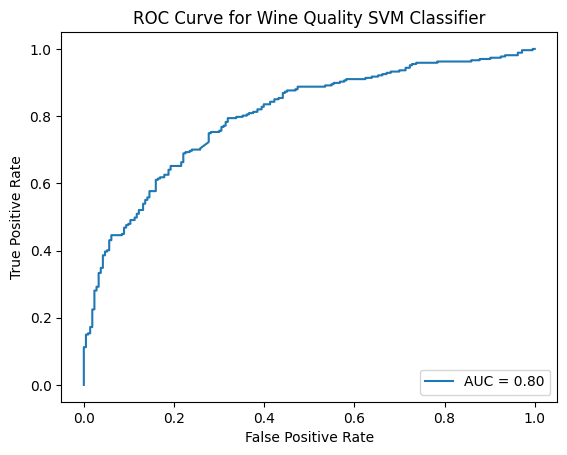

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the Wine Quality dataset
url_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url_wine, delimiter=';')

# Splitting the dataset into features and target
X_wine = wine_data.drop('quality', axis=1)
y_wine = wine_data['quality']

# Binarizing the target for classification
y_wine = (y_wine >= 6).astype(int)

# Split the dataset into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_wine, y_train_wine)

# Predictions and evaluation
y_pred_wine = svm_classifier.predict(X_test_wine)
print("Accuracy:", accuracy_score(y_test_wine, y_pred_wine))
print("Classification Report:\n", classification_report(y_test_wine, y_pred_wine))

# ROC Curve
y_prob_wine = svm_classifier.predict_proba(X_test_wine)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_wine, y_prob_wine)
roc_auc = roc_auc_score(y_test_wine, y_prob_wine)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Wine Quality SVM Classifier')
plt.legend(loc="lower right")
plt.show()


SVM Regressor for Concrete Compressive Strength
---

```
# This is formatted as code
```



In [10]:
pip install scikit-learn pandas matplotlib seaborn


Mean Squared Error: 123.00948299412804
R-squared: 0.5453827111279995


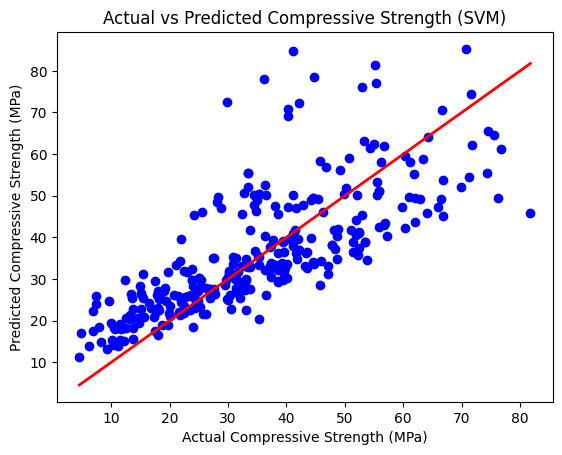

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Concrete Compressive Strength dataset
url_concrete = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
concrete_data = pd.read_excel(url_concrete)

# Strip extra spaces from column names
concrete_data.columns = concrete_data.columns.str.strip()

# Use the correct column names for features and target
X_concrete = concrete_data.drop('Concrete compressive strength(MPa, megapascals)', axis=1)
y_concrete = concrete_data['Concrete compressive strength(MPa, megapascals)']

# Split the dataset into training and testing sets
X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(X_concrete, y_concrete, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_concrete = scaler.fit_transform(X_train_concrete)
X_test_concrete = scaler.transform(X_test_concrete)

# Create and train the SVM regressor
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_concrete, y_train_concrete)

# Predictions and evaluation
y_pred_concrete = svm_regressor.predict(X_test_concrete)
print("Mean Squared Error:", mean_squared_error(y_test_concrete, y_pred_concrete))
print("R-squared:", r2_score(y_test_concrete, y_pred_concrete))

# Plotting Actual vs Predicted
plt.scatter(y_test_concrete, y_pred_concrete, color='blue')
plt.plot([y_test_concrete.min(), y_test_concrete.max()], [y_test_concrete.min(), y_test_concrete.max()], color='red', linewidth=2)
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs Predicted Compressive Strength (SVM)')
plt.show()
